In [2]:
import torch
from torch import nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.8.0'

In [ ]:
# creating a dataset
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weights + bias


In [7]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240]]))

In [8]:
len(X), len(y)

(50, 50)

In [9]:
# train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [33]:
# visulize the dataset by creating a function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    # plotting the tran data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # plotting the test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14});




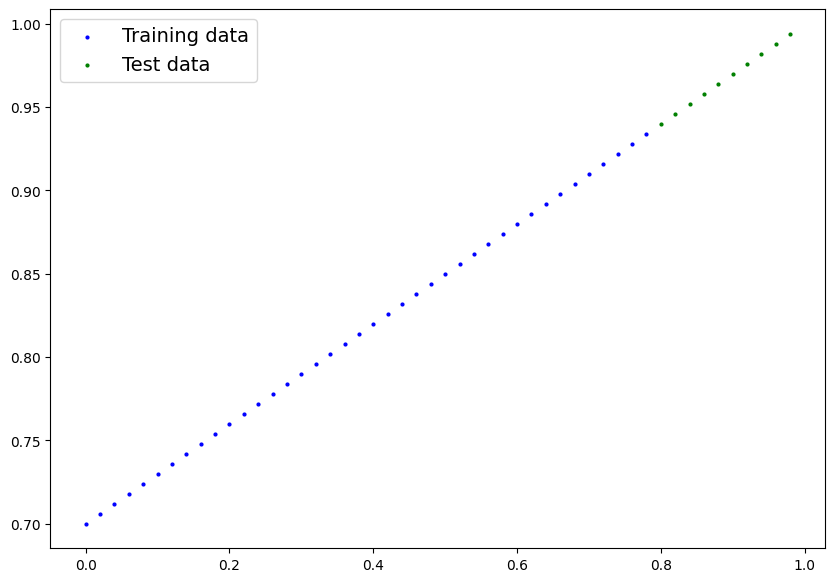

In [34]:
plot_predictions()

In [23]:
# creating a linear regression model

class LinearRegresionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x):
            return self.weight * x + self.bias
            

In [24]:
model_0 = LinearRegresionModel()
model_0

LinearRegresionModel()

In [25]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Checking the contents of the pytorch model

In [26]:
# create a random seed
torch.manual_seed(42)

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
weights, bias

(0.3, 0.7)

In [21]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9400],
         [0.9460],
         [0.9520],
         [0.9580],
         [0.9640],
         [0.9700],
         [0.9760],
         [0.9820],
         [0.9880],
         [0.9940]]))

In [28]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [29]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [31]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

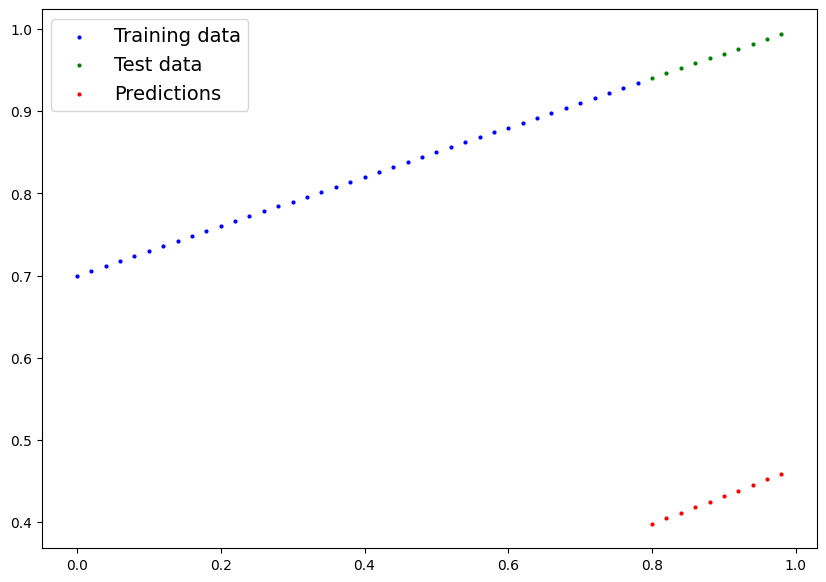

In [50]:
plot_predictions(predictions=y_preds)

In [51]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3018])), ('bias', tensor([0.6903]))])

In [52]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (sctchastc gradient decent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [53]:

torch.manual_seed(42)
# an epoch is one loop through the data... (this is a hyperparameter becsause we set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


### Training

# 0. loop through the data
for epoch in range(epochs):
  # set the mode to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to required gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ## testing
  model_0.state_dict()

  ## testing
  model_0.eval() # turns off different settings in the model not needed for evalutation/testing
  with torch.inference_mode(): # this turns off gradinet tracking & a couple of more things behind the scenes

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    print(f"Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}")
    # print out model state_dict()
    print(model_0.state_dict())

Epoch: 0| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])
Epoch: 10| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])
Epoch: 20| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])
Epoch: 30| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])
Epoch: 40| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])
Epoch: 50| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])
Epoch: 60| Loss: 0.008988435380160809 | Test loss: 0.00538221001625061
OrderedDict([('weight', tensor([0.3057])), ('bias', tensor([0.7003]))])


In [47]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [48]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.00898844, 0.00898844, 0.00898844, 0.00898844, 0.00898844,
        0.00898844, 0.00898844, 0.00898844, 0.00898844, 0.00898844,
        0.00898844, 0.00898844, 0.00898844, 0.00898844, 0.00898844,
        0.00898844, 0.00898844, 0.00898844, 0.00898844, 0.00898844],
       dtype=float32),
 [0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061,
  0.00538221001625061])

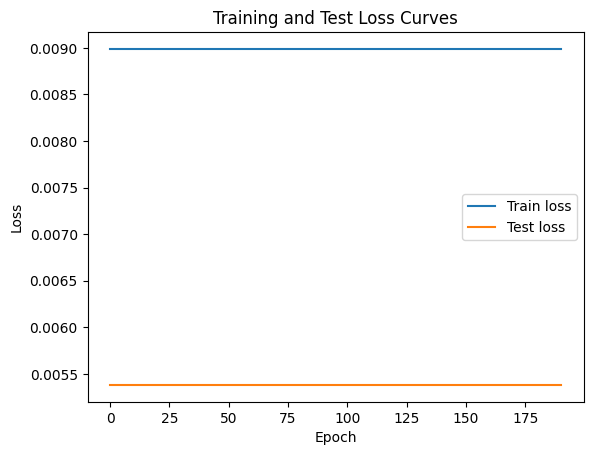

In [55]:
import matplotlib.pyplot as plt

plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()